In [1]:
include("../retrieval.jl")

simulate_retrieval (generic function with 1 method)

# Critical Noise

### Reconstruction probability
In order to compute the reconstruction probability, we proceed as follows:
- define a range of "perturb probability", for example `pp = range( 0.08, 0.58, length = 22 )`;
- then, for each $ p \in pp $:
    - generate a big number of indipendent samples $ \xi $ and initialize a counter;
        - select a random pattern from $ \xi $ perturb it with p and run the zero-temperatur Monte-Carlo;
        - if the final overlap with the original pattern is bigger or equal than 0.95, consider it as a success and update counter;
        - repeat for all the samples.
    - the reconstruction probability for $ p $ is just the fraction of successes.

reconstruction_probability(NN::AbstractVector,
    α;
    pp::AbstractVector = range( 0.08, 0.58, length = 22 ),
    nsweeps = 100,
    β = 10^3,
    nsamples = 5*10^2,
    earlystop = 0,
    thr = 0.95,
    show = false,
    save = true)

In [2]:
pp = range(0.02, 0.45, length = 22)
N = 100
α = 0.13
nsamples = 1000
a, b, c, d = one_retrieval_frequency(N, α, nsamples, pp; β = 10^4, annealing = -1)

([0.906, 0.931, 0.946, 0.936, 0.939, 0.921, 0.914, 0.876, 0.816, 0.791  …  0.619, 0.5, 0.458, 0.368, 0.294, 0.203, 0.156, 0.096, 0.068, 0.052], [0.009233052000787726, 0.008018934050315158, 0.007150883521295438, 0.007743640226919293, 0.007572076091557425, 0.008534156773333464, 0.008870325962594766, 0.010427498872343961, 0.012259457340938586, 0.01286407728849931  …  0.015364734787007436, 0.015819299929208316, 0.015763390640483706, 0.015258073561521805, 0.014414290540008213, 0.012726073744598264, 0.011480235006122358, 0.009320454434783227, 0.007964887911291603, 0.0070246242138171525], [0.98194, 0.97826, 0.9781599999999998, 0.9710599999999999, 0.9666399999999999, 0.9590200000000001, 0.95158, 0.9309999999999999, 0.8965599999999999, 0.882  …  0.7654, 0.6878200000000001, 0.64302, 0.57128, 0.5121400000000002, 0.39678, 0.3513200000000001, 0.27576, 0.20626000000000003, 0.14057999999999995], [6.594076572640466e-5, 7.724855817256226e-5, 7.832975137168475e-5, 8.837356101394968e-5, 0.000102840101548

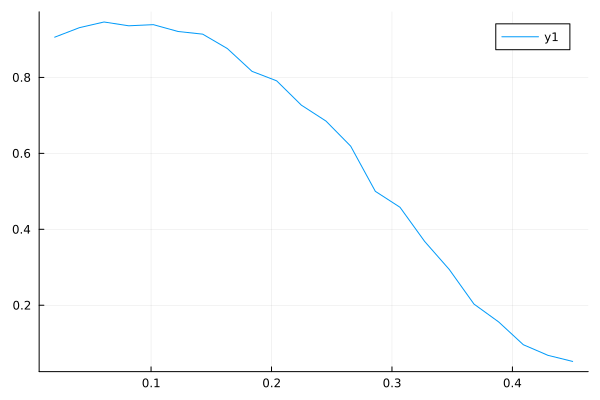

In [4]:
plot(pp, a)

------------------α = 0.12------------------
N = 100 ---> Done!


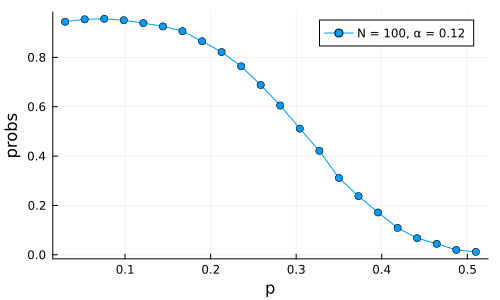

 72.905605 seconds (5.92 M allocations: 43.905 GiB, 8.29% gc time)


In [22]:
dd = [(0.12, range(0.03, 0.51, length = 22))]
NN = [(100, 10000)]
@time simulate_retrieval(NN, dd; save = false, show = true, β = 10^2, annealing = 0)

In [ ]:
pp = readdlm("../julia_data/reconstruction_prob/alpha_01/probsN70.txt")[:,1]
p70 = readdlm("../julia_data/reconstruction_prob/alpha_01/probsN70.txt")[:,2]
e70 = readdlm("../julia_data/reconstruction_prob/alpha_01/probsN70.txt")[:,3]

p250 = readdlm("../julia_data/reconstruction_prob/alpha_01/probsN250.txt")[:,2]
e250 = readdlm("../julia_data/reconstruction_prob/alpha_01/probsN250.txt")[:,3]

p500 = readdlm("../julia_data/reconstruction_prob/alpha_01/probsN500.txt")[:,2]
e500 = readdlm("../julia_data/reconstruction_prob/alpha_01/probsN500.txt")[:,3]

In [ ]:
dd = [(0.14, range(0.03, 0.51, length = 22)), (0.13, range(0.05, 0.53, length = 22)), (0.12, range(0.06, 0.54, length = 22)),
    (0.11, range(0.1, 0.54, length = 22)), (0.1, range(0.12, 0.56, length = 22)), (0.09, range(0.12, 0.56, length = 22)),
    (0.08, range(0.13, 0.57, length = 22)), (0.07, range(0.16, 0.6, length = 22)), (0.06, range(0.18, 0.61, length = 22))]

In [ ]:
dd = [(0.13, range(0.02, 0.42, length = 22)),
      (0.12, range(0.04, 0.44, length = 22)),
      (0.11, range(0.06, 0.48, length = 22)),
      (0.10, range(0.08, 0.50, length = 22)),
      (0.09, range(0.12, 0.56, length = 22)),
      (0.08, range(0.16, 0.60, length = 22))]

In [ ]:
dd = [(0.07, range(0.18, 0.62, length = 22)),
      (0.06, range(0.20, 0.62, length = 22)),
      (0.05, range(0.22, 0.64, length = 22)),
      (0.04, range(0.26, 0.66, length = 22)),
      (0.03, range(0.30, 0.70, length = 22)),
      (0.02, range(0.32, 0.72, length = 22))]


In [ ]:
NN = [(100, 10^5), (200, 10^5), (600, 2*10^4)]

In [9]:
t = 100
N = 2000
α = 0.4
M = round(Int, N*α)
overlaps = zeros(t)

for i in 1:t
    ξ = SH.generate_patterns(M, N)
    J = SH.store(ξ)
    k = rand(1:M)
    σ = ξ[:, k]
    σ_rec = SH.monte_carlo(σ, J; β = 1000, annealing = -1)
    m = SH.overlap(σ_rec, σ)
    overlaps[i] = m
    #println(m)
end

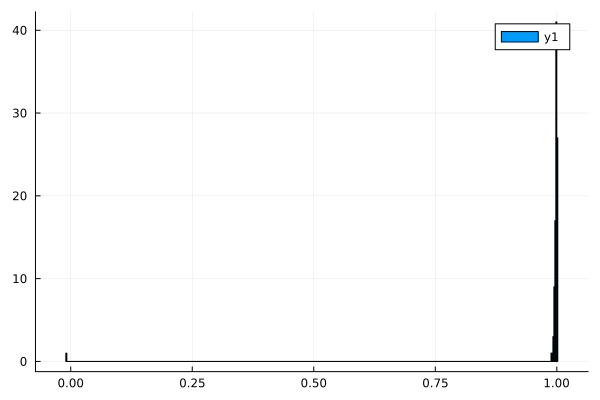

In [8]:
histogram(overlaps)

In [25]:
a = [1,2,3,4,5]
b = [2,1,6,3,2]

5-element Vector{Int64}:
 2
 1
 6
 3
 2

In [28]:
a .>= b .&& a .>= 3

5-element BitVector:
 0
 0
 0
 1
 1